In [6]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [16]:
# # Load csv file and clean 
mvc_injury_fatal = pd.read_csv("./Injury_and_Fatality.csv")

# Handle missing values if necessary
mvc_injury_fatal.dropna(inplace=True)

# Remove duplicates if necessary
mvc_injury_fatal.drop_duplicates(inplace=True)

print(mvc_injury_fatal.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389218 entries, 4 to 1048572
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     389218 non-null  object 
 1   BOROUGH                        389218 non-null  object 
 2   ON STREET NAME                 389218 non-null  object 
 3   NUMBER OF PERSONS INJURED      389218 non-null  float64
 4   NUMBER OF PERSONS KILLED       389218 non-null  float64
 5   NUMBER OF PEDESTRIANS INJURED  389218 non-null  int64  
 6   NUMBER OF PEDESTRIANS KILLED   389218 non-null  int64  
 7   NUMBER OF CYCLIST INJURED      389218 non-null  int64  
 8   NUMBER OF CYCLIST KILLED       389218 non-null  int64  
 9   NUMBER OF MOTORIST INJURED     389218 non-null  int64  
 10  NUMBER OF MOTORIST KILLED      389218 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 35.6+ MB
None


In [22]:
# Convert column 3 and 4 dtypes into int64
mvc_injury_fatal['NUMBER OF PERSONS INJURED'] = mvc_injury_fatal['NUMBER OF PERSONS INJURED'].astype('int64')
mvc_injury_fatal['NUMBER OF PERSONS KILLED'] = mvc_injury_fatal['NUMBER OF PERSONS KILLED'].astype('int64')

print(mvc_injury_fatal.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389218 entries, 4 to 1048572
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   CRASH DATE                     389218 non-null  object
 1   BOROUGH                        389218 non-null  object
 2   ON STREET NAME                 389218 non-null  object
 3   NUMBER OF PERSONS INJURED      389218 non-null  int64 
 4   NUMBER OF PERSONS KILLED       389218 non-null  int64 
 5   NUMBER OF PEDESTRIANS INJURED  389218 non-null  int64 
 6   NUMBER OF PEDESTRIANS KILLED   389218 non-null  int64 
 7   NUMBER OF CYCLIST INJURED      389218 non-null  int64 
 8   NUMBER OF CYCLIST KILLED       389218 non-null  int64 
 9   NUMBER OF MOTORIST INJURED     389218 non-null  int64 
 10  NUMBER OF MOTORIST KILLED      389218 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 35.6+ MB
None


In [23]:
# Step 1: Check for Missing Values
missing_values = mvc_injury_fatal.isnull().sum()
print(missing_values)

CRASH DATE                       0
BOROUGH                          0
ON STREET NAME                   0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64


In [32]:
# Aggregate Data
mvc_injury_fatal['TOTAL_INJURED'] = (mvc_injury_fatal['NUMBER OF PERSONS INJURED'] + 
                                     mvc_injury_fatal['NUMBER OF PEDESTRIANS INJURED'] + 
                                     mvc_injury_fatal['NUMBER OF CYCLIST INJURED'] + 
                                     mvc_injury_fatal['NUMBER OF MOTORIST INJURED'])

mvc_injury_fatal['TOTAL_KILLED'] = (mvc_injury_fatal['NUMBER OF PERSONS KILLED'] + 
                                    mvc_injury_fatal['NUMBER OF PEDESTRIANS KILLED'] + 
                                    mvc_injury_fatal['NUMBER OF CYCLIST KILLED'] + 
                                    mvc_injury_fatal['NUMBER OF MOTORIST KILLED'])

# Sum total Injuries and Fatalities by BOROUGH
borough_summary = mvc_injury_fatal.groupby('BOROUGH').agg({
    'TOTAL_INJURED': 'sum',
    'TOTAL_KILLED': 'sum'
}).reset_index()


print(borough_summary)

         BOROUGH  TOTAL_INJURED  TOTAL_KILLED
0          BRONX          52037           224
1       BROOKLYN         106848           482
2      MANHATTAN          42198           284
3         QUEENS          92287           419
4  STATEN ISLAND          12566            71


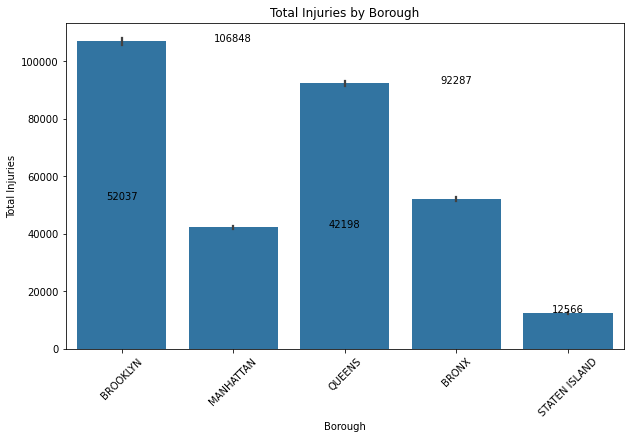

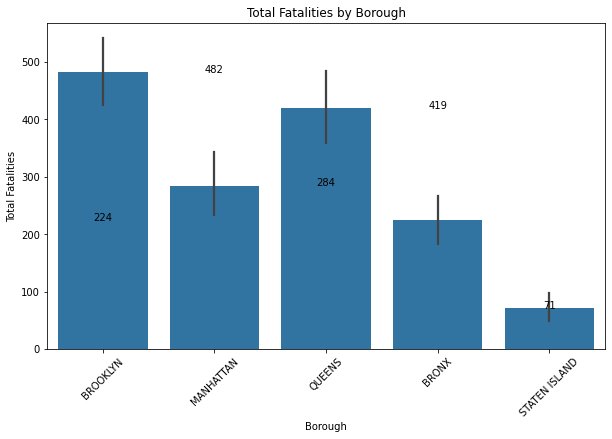

In [35]:
# Visualize Total Injuries 
plt.figure(figsize=(10, 6))
sns.barplot(x='BOROUGH', y='TOTAL_INJURED', data=mvc_injury_fatal, estimator=sum)

# Add numbers on top of bars
for index, row in borough_summary.iterrows():
    plt.text(row.name, row.TOTAL_INJURED, round(row.TOTAL_INJURED, 2), color='black', ha="center")
    
plt.title('Total Injuries by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Fatalities
plt.figure(figsize=(10, 6))
sns.barplot(x='BOROUGH', y='TOTAL_KILLED', data=mvc_injury_fatal, estimator=sum)

# Add numbers on top of bars
for index, row in borough_summary.iterrows():
    plt.text(row.name, row.TOTAL_KILLED, round(row.TOTAL_KILLED, 2), color='black', ha="center")
plt.title('Total Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.show()